In [ ]:
pip install cartopy


--- Select a type of pathogen ---
1. Bacteria (1 DNA point per infected person)
2. Parasite (2 DNA points per infected person)
3. Virus (3 DNA points per infected person)


Enter the number of your chosen pathogen type:  2


Pathogen type selected: Parasite

--- Select a starting region ---
1. North America
2. Central America
3. Caribbean
4. South America
5. East Europe
6. West Europe
7. North Europe
8. Middle East
9. Central Asia
10. East Asia
11. Northern Africa
12. Southern Africa
13. Australia


Enter the number of your chosen starting region:  1


Plague started in: North America
4 new infections in North America!
Cure progress increased to 14%
Cure progress increased to 14%

--- Game Interface Overview ---
DNA Points: 8
Pathogen Type: Parasite
Transmission Level: 1
Symptoms Level: 1
Abilities Level: 1
Cure Progress: 14%

Infection Rates per Day:
- North America: 1-5 person(s) per day
- Central America: 1-5 person(s) per day
- Caribbean: 1-5 person(s) per day
- South America: 1-5 person(s) per day
- East Europe: 1-3 person(s) per day
- West Europe: 1-3 person(s) per day
- North Europe: 1-3 person(s) per day
- Middle East: 1-5 person(s) per day
- Central Asia: 1-5 person(s) per day
- East Asia: 1-5 person(s) per day
- Northern Africa: 1-2 person(s) per day
- Southern Africa: 1-2 person(s) per day
- Australia: 1-2 person(s) per day

Infected Regions:
- North America: 5 infected out of 100
- Central America: 0 infected out of 100
- Caribbean: 0 infected out of 100
- South America: 0 infected out of 100
- East Europe: 0 infected out

Choose an aspect to evolve (or 5 to finish):  5


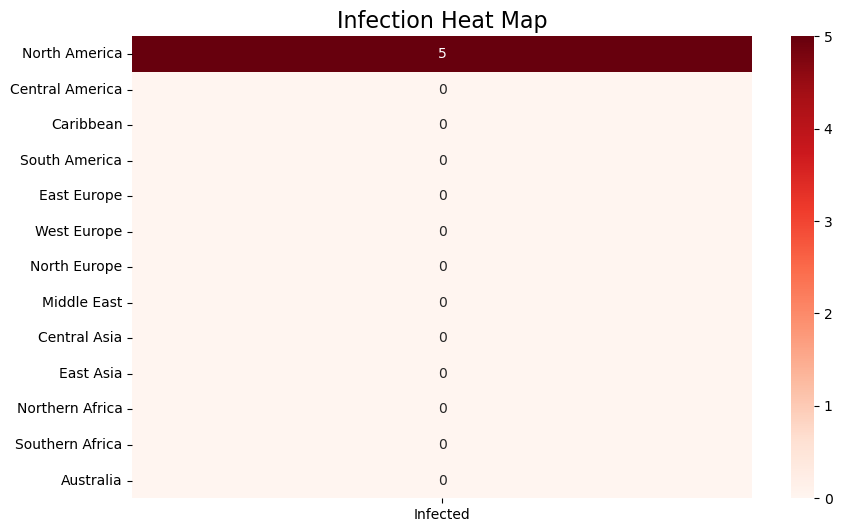

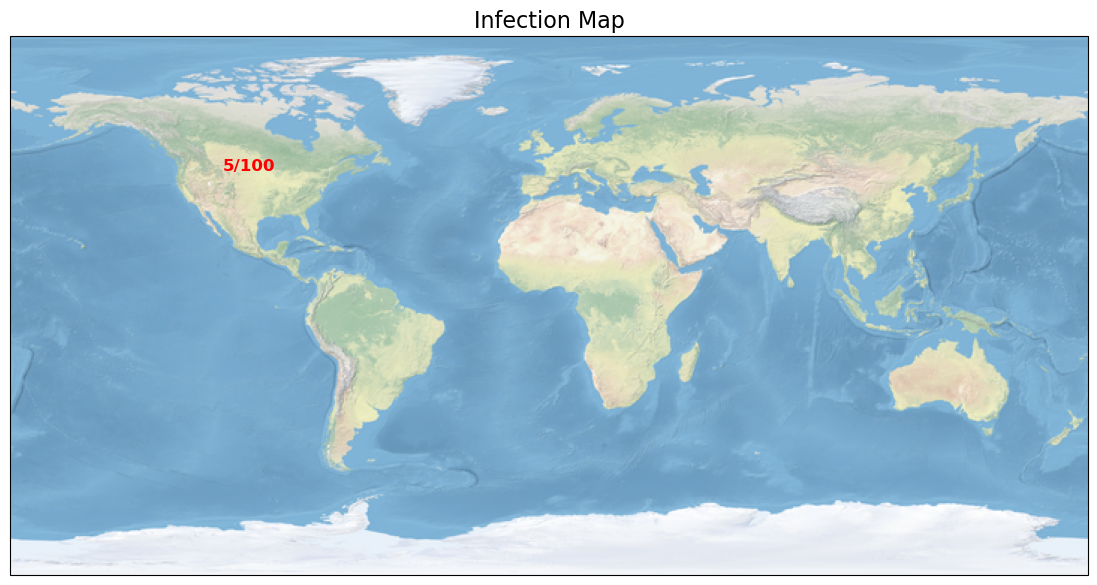

Press Enter to simulate the next day...
 


5 new infections in North America!
North America has developed immunity! Infections decrease by 20% per day.

--- Spread to a new region ---
1. Central America
2. Caribbean
3. South America
4. East Europe
5. West Europe
6. North Europe
7. Middle East
8. Central Asia
9. East Asia
10. Northern Africa
11. Southern Africa
12. Australia


Enter the number of your chosen region:  1


Plague spread to: Central America
Cure progress increased to 29%
Cure progress increased to 29%

--- Game Interface Overview ---
DNA Points: 18
Pathogen Type: Parasite
Transmission Level: 1
Symptoms Level: 1
Abilities Level: 1
Cure Progress: 29%

Infection Rates per Day:
- North America: 1-5 person(s) per day
- Central America: 1-5 person(s) per day
- Caribbean: 1-5 person(s) per day
- South America: 1-5 person(s) per day
- East Europe: 1-3 person(s) per day
- West Europe: 1-3 person(s) per day
- North Europe: 1-3 person(s) per day
- Middle East: 1-5 person(s) per day
- Central Asia: 1-5 person(s) per day
- East Asia: 1-5 person(s) per day
- Northern Africa: 1-2 person(s) per day
- Southern Africa: 1-2 person(s) per day
- Australia: 1-2 person(s) per day

Infected Regions:
- North America: 10 infected out of 100
- Central America: 1 infected out of 100
- Caribbean: 0 infected out of 100
- South America: 0 infected out of 100
- East Europe: 0 infected out of 100
- West Europe: 0 infecte

Choose an aspect to evolve (or 5 to finish):  4
Enter the quantity to upgrade:  1


Cure slowed down by 1 levels.
Remaining DNA Points: 3

--- Evolve your plague --- (Remaining DNA Points: 3)
1. Increase Transmission (10 DNA points per level)
2. Increase Symptoms (10 DNA points per level)
3. Increase Abilities (10 DNA points per level)
4. Slow Cure (15 DNA points per level)
5. Done evolving


In [ ]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs   # initializes world map

class PlagueInc:
    def __init__(self):
        self.pathogen_type = ""
        self.current_region = ""
        self.dna_points = 0
        self.infected_regions = {
            "North America": 0,
            "Central America": 0,
            "Caribbean": 0,
            "South America": 0,
            "East Europe": 0,
            "West Europe": 0,
            "North Europe": 0,
            "Middle East": 0,
            "Central Asia": 0,
            "East Asia": 0,
            "Northern Africa": 0,
            "Southern Africa": 0,
            "Australia": 0
        }
        # baseline increase in infected per turn
        self.infection_rates = {
            "North America": (1, 5),
            "Central America": (1, 5),
            "Caribbean": (1, 5),
            "South America": (1, 5),
            "East Europe": (1, 3),
            "West Europe": (1, 3),
            "North Europe": (1, 3),
            "Middle East": (1, 5),
            "Central Asia": (1, 5),
            "East Asia": (1, 5),
            "Northern Africa": (1, 2),
            "Southern Africa": (1, 2),
            "Australia": (1, 2)
        }
        # initial stats
        self.immunity = {}
        self.transmission = 1
        self.symptoms = 1
        self.abilities = 1
        self.cure_progress = 0
        self.environmental_resistance = 1.0

    # serves as choosing difficulty
    def select_pathogen_type(self):
        print("\n\033[1m\033[94m--- Select a type of pathogen ---\033[0m")
        print("\033[1m\033[92m1. Bacteria (1 DNA point per infected person)\033[0m")
        print("\033[1m\033[93m2. Parasite (2 DNA points per infected person)\033[0m")
        print("\033[1m\033[91m3. Virus (3 DNA points per infected person)\033[0m")
        while True:
            choice = input("Enter the number of your chosen pathogen type: ")
            if choice == "1":
                self.pathogen_type = "Bacteria"
                break
            elif choice == "2":
                self.pathogen_type = "Parasite"
                break
            elif choice == "3":
                self.pathogen_type = "Virus"
                break
            else:
                print("\033[1m\033[91mInvalid input. Please enter a valid input.\033[0m")

        print(f"\033[1m\033[94mPathogen type selected: {self.pathogen_type}\033[0m")

    def select_starting_region(self):
        print("\n\033[1m\033[94m--- Select a starting region ---\033[0m")
        regions = list(self.infected_regions.keys())
        for i, region in enumerate(regions, start=1):
            print(f"\033[1m\033[92m{i}. {region}\033[0m")
        while True:
            try:
                choice = int(input("Enter the number of your chosen starting region: "))
                if 1 <= choice <= len(regions):
                    self.current_region = regions[choice - 1]
                    self.infected_regions[self.current_region] = 1
                    print(f"\033[1m\033[94mPlague started in: {self.current_region}\033[0m")
                    break
                else:
                    print("\033[1m\033[91mInvalid input. Please enter a valid input.\033[0m")
            except ValueError:
                print("\033[1m\033[91mInvalid input. Please enter a valid input.\033[0m")

    # interface with ANSI for appearance 
    def display_interface(self):
        print("\n\033[1m\033[94m--- Game Interface Overview ---\033[0m")
        print(f"\033[1m\033[95mDNA Points:\033[0m \033[1m\033[92m{self.dna_points}\033[0m")
        print(f"\033[1m\033[95mPathogen Type:\033[0m \033[1m\033[93m{self.pathogen_type}\033[0m")
        print(f"\033[1m\033[95mTransmission Level:\033[0m \033[1m\033[92m{self.transmission}\033[0m")
        print(f"\033[1m\033[95mSymptoms Level:\033[0m \033[1m\033[92m{self.symptoms}\033[0m")
        print(f"\033[1m\033[95mAbilities Level:\033[0m \033[1m\033[92m{self.abilities}\033[0m")
        print(f"\033[1m\033[95mCure Progress:\033[0m \033[1m\033[91m{self.cure_progress}%\033[0m")
        print("\n\033[1m\033[95mInfection Rates per Day:\033[0m")
        for region, rate in self.infection_rates.items():
            print(f"- {region}: {rate[0]}-{rate[1]} person(s) per day")
        print("\n\033[1m\033[95mInfected Regions:\033[0m")
        for region, count in self.infected_regions.items():
            print(f"- {region}: \033[1m\033[93m{count} infected out of 100\033[0m")
        if self.immunity:
            print("\n\033[1m\033[95mImmunity:\033[0m")
            for region, immunity in self.immunity.items():
                print(f"- {region}: \033[1m\033[94m{int(immunity * 100)}% reduction\033[0m")

    # upgrades each term and defines each associated cost
    def evolve_plague(self):
        while True:
            print(f"\n\033[1m\033[94m--- Evolve your plague ---\033[0m (Remaining DNA Points: \033[1m\033[92m{self.dna_points}\033[0m)")
            print("\033[1m\033[92m1. Increase Transmission (10 DNA points per level)\033[0m")
            print("\033[1m\033[93m2. Increase Symptoms (10 DNA points per level)\033[0m")
            print("\033[1m\033[91m3. Increase Abilities (10 DNA points per level)\033[0m")
            print("\033[1m\033[96m4. Slow Cure (15 DNA points per level)\033[0m")
            print("\033[1m\033[95m5. Done evolving\033[0m")
            choice = input("Choose an aspect to evolve (or 5 to finish): ")

            # Optimizing gameplay mechanics when selecting upgrades (Post bug-fixing)
            if choice in ["1", "2", "3", "4"]:
                while True:
                    try:
                        quantity = int(input("Enter the quantity to upgrade: "))
                        cost = (10 * quantity if choice != "4" else 15 * quantity)
                        if self.dna_points >= cost:
                            if choice == "1":
                                self.transmission += quantity
                                self.dna_points -= cost
                                print(f"\033[1m\033[92mTransmission increased by {quantity}.\033[0m")
                            elif choice == "2":
                                self.symptoms += quantity
                                self.dna_points -= cost
                                print(f"\033[1m\033[93mSymptoms increased by {quantity}.\033[0m")
                            elif choice == "3":
                                self.abilities += quantity
                                self.environmental_resistance *= (1.1 ** quantity)
                                self.dna_points -= cost
                                print(f"\033[1m\033[91mAbilities increased by {quantity}. Environmental resistance enhanced.\033[0m")
                            elif choice == "4":
                                self.cure_progress -= 10 * quantity
                                self.dna_points -= cost
                                print(f"\033[1m\033[96mCure slowed down by {quantity} levels.\033[0m")
                            break
                        else:
                            print("\033[1m\033[91mInsufficient DNA points. Please enter a lower quantity.\033[0m")
                    except ValueError:
                        print("\033[1m\033[91mInvalid input. Please enter a valid number.\033[0m")
            elif choice == "5":
                break
            else:
                print("\033[1m\033[91mInvalid input. Please enter a valid input.\033[0m")

            print(f"Remaining DNA Points: \033[1m\033[92m{self.dna_points}\033[0m")

    def infect_current_region(self):
        for region, infected in self.infected_regions.items():
            if infected > 0:
                base_infections = random.randint(*self.infection_rates[region])
                exponential_factor = 1 + (infected / 100) ** 2
                daily_infections = int(base_infections * self.transmission * exponential_factor * self.environmental_resistance)  # Gameplay version of original SIR disease growth equation
                new_infections = min(100 - self.infected_regions[region], daily_infections)
                self.infected_regions[region] += new_infections
                self.dna_points += new_infections * (3 if self.pathogen_type == "Virus" else (2 if self.pathogen_type == "Parasite" else 1))
                print(f"\033[1m\033[94m{new_infections} new infections in {region}!\033[0m")

        if self.infected_regions[self.current_region] >= 10 and self.current_region not in self.immunity:
            self.immunity[self.current_region] = 0.2
            print(f"\033[1m\033[94m{self.current_region} has developed immunity! Infections decrease by 20% per day.\033[0m")  # Can be expanded upon, each region only goes to 20% but didn't find worth changing
            self.spread_to_new_region()  # spread is a bit fast but for initial game functions well enough (balance issues)

    # Transmission of disease (Based on transmission upgrades)
    def spread_to_new_region(self):
        selectable_regions = [region for region in self.infected_regions if region != self.current_region and self.infected_regions[region] == 0]
        if selectable_regions:
            print("\n\033[1m\033[94m--- Spread to a new region ---\033[0m")
            for i, region in enumerate(selectable_regions, start=1):
                print(f"\033[1m\033[92m{i}. {region}\033[0m")
            while True:
                try:
                    choice = int(input("Enter the number of your chosen region: "))
                    if 1 <= choice <= len(selectable_regions):
                        new_region = selectable_regions[choice - 1]
                        self.current_region = new_region
                        self.infected_regions[self.current_region] = 1
                        print(f"\033[1m\033[94mPlague spread to: {self.current_region}\033[0m")
                        break
                    else:
                        print("\033[1m\033[91mInvalid input. Please enter a valid input.\033[0m")
                except ValueError:
                    print("\033[1m\033[91mInvalid input. Please enter a valid input.\033[0m")
        else:
            print("\033[1m\033[94mNo new regions available to infect.\033[0m")

    # cure progress updating system (hopefully working now)
    def manage_cure(self):
        self.cure_progress += random.randint(1, 5) * self.symptoms + 10
        if self.cure_progress > 100:
            self.cure_progress = 100
        if self.cure_progress < 0:
            self.cure_progress = 0
        print(f"\033[1m\033[94mCure progress increased to {self.cure_progress}%\033[0m")

        print(f"\033[1m\033[94mCure progress increased to {self.cure_progress}%\033[0m")

    # heatmap with numerical infected count
    def plot_infection_heatmap(self):
        data = [[self.infected_regions.get(region, 0)] for region in self.infected_regions]
        plt.figure(figsize=(10, 6))
        sns.heatmap(data, annot=True, fmt="d", cmap="Reds", yticklabels=list(self.infected_regions.keys()), xticklabels=["Infected"])
        plt.title('Infection Heat Map', fontsize=16)
        plt.show()

    # map implementation using cartopy and coordinates for each region (alternative to geopandas)
    def plot_infection_map(self):
        fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.PlateCarree()})
        ax.stock_img()
        ax.set_global()
        for region, infected in self.infected_regions.items():
            if infected > 0:
                coordinates = {
                    "North America": (-100, 45),
                    "Central America": (-115, 15),
                    "Caribbean": (-75, 15),
                    "South America": (-60, -15),
                    "East Europe": (30, 55),
                    "West Europe": (0, 50),
                    "North Europe": (10, 60),
                    "Middle East": (45, 30),
                    "Central Asia": (65, 40),
                    "East Asia": (120, 40),
                    "Northern Africa": (10, 20),
                    "Southern Africa": (20, -20),
                    "Australia": (140, -25)
                }
                x, y = coordinates[region]
                ax.text(x, y, f"{infected}/100", color='red', fontsize=12, weight='bold', ha='center', transform=ccrs.PlateCarree())
        plt.title('Infection Map', fontsize=16)
        plt.show()
        
    # user interface during daily cycle
    def simulate_day(self):
        self.infect_current_region()
        self.manage_cure()
        self.display_interface()
        self.evolve_plague()
        self.plot_infection_heatmap()
        self.plot_infection_map()

    # checking for win condition per turn (infection reaches 100% in each region = win; NOTE: cure reaches 100% = lose)
    def check_win_condition(self):
        total_infected = sum(self.infected_regions.values())
        total_population = 100 * len(self.infected_regions)
        if total_infected >= total_population:
            print("\033[1m\033[92mAll of humanity is wiped out! You win!\033[0m")
            return True
        if self.cure_progress >= 100:
            print("\033[1m\033[91mThe disease has been cured! You lose.\033[0m")
            return True
        return False

if __name__ == "__main__":
    game = PlagueInc()
    game.select_pathogen_type()
    game.select_starting_region()

    while True:
        game.simulate_day()
        if game.check_win_condition():
            break
        input("Press Enter to simulate the next day...\n")